In [ ]:
!pip install mkl-service
!pip install mnist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)
#mkl.set_num_threads(4)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

## Utility functions

In [ ]:
def append_ones(matrix, axis=1):
    ones = np.ones((matrix.shape[0], 1), dtype=matrix.dtype)
    return np.concatenate((matrix, ones), axis=axis)

## Feed-forward, activations and tiles

In [ ]:
from numpy.core.fromnumeric import shape
# one layer feed forward
def feed_forward(W, dataset, activation_fun):
  return activation_fun(dataset@W[:,:-1])

In [ ]:
# sigmoid activation function
def sigmoid(matrix):
    # activations = ...
    # return activations

    return 1/(1 + np.exp(-matrix))
    
    #raise Exception("Not implemented!")
    

In [ ]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2

    Sbt = space_between_tiles

    image_width = cols_count*tile_width + (cols_count-1)*Sbt
    image_height = rows_count*tile_height + (rows_count-1)*Sbt

    print(rows_count,"  ", cols_count, "  ", tile_height, "  ", tile_width, "  ", image_width, "  ", image_height )

    img_matrix = np.empty(shape=(image_width, image_height))
    img_matrix.fill(0)

    for i in range(cols_count):
      for j in range(rows_count):
        pos_x = (tile_width+Sbt)*i
        pos_y = (tile_height+Sbt)*j

        #print(np.shape(examples[i, j]))

        img_matrix[pos_x:pos_x+tile_width, pos_y:pos_y+tile_height] = examples[j, i]
        #img_matrix[(space_between_tiles+tile_width)*i +space_between_tiles, (space_between_tiles+tile_height)*j+space_between_tiles] = examples[i,j]

    #raise Exception("Not implemented!")
    
    return img_matrix

## Histogram of activations and filters plot

In [ ]:
class Rbm:
    def __init__(self, visible_size, hidden_size, learning_rate):
        self.visible_size = visible_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.W = np.random.normal(scale=0.01, size=(visible_size+1, hidden_size+1)).astype(np.float32)
        self.W[:, -1] = 0.0
        self.W[-1, :] = 0.0

In [ ]:
import mnist
import pickle
import seaborn as sns

with open("./lab1_rbm.pickle.dat", "rb") as f:
    rbm = pickle.load(f)

DATASET_SIZE = 512
DIGIT_SIZE = 28
mnist_dataset = mnist.test_images().astype(np.float32)
np.random.shuffle(mnist_dataset)
mnist_dataset = np.reshape(mnist_dataset[:DATASET_SIZE] / 255.0, newshape=(DATASET_SIZE, DIGIT_SIZE*DIGIT_SIZE))

mnist_dataset = append_ones(mnist_dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


16    32    28    28    958    478


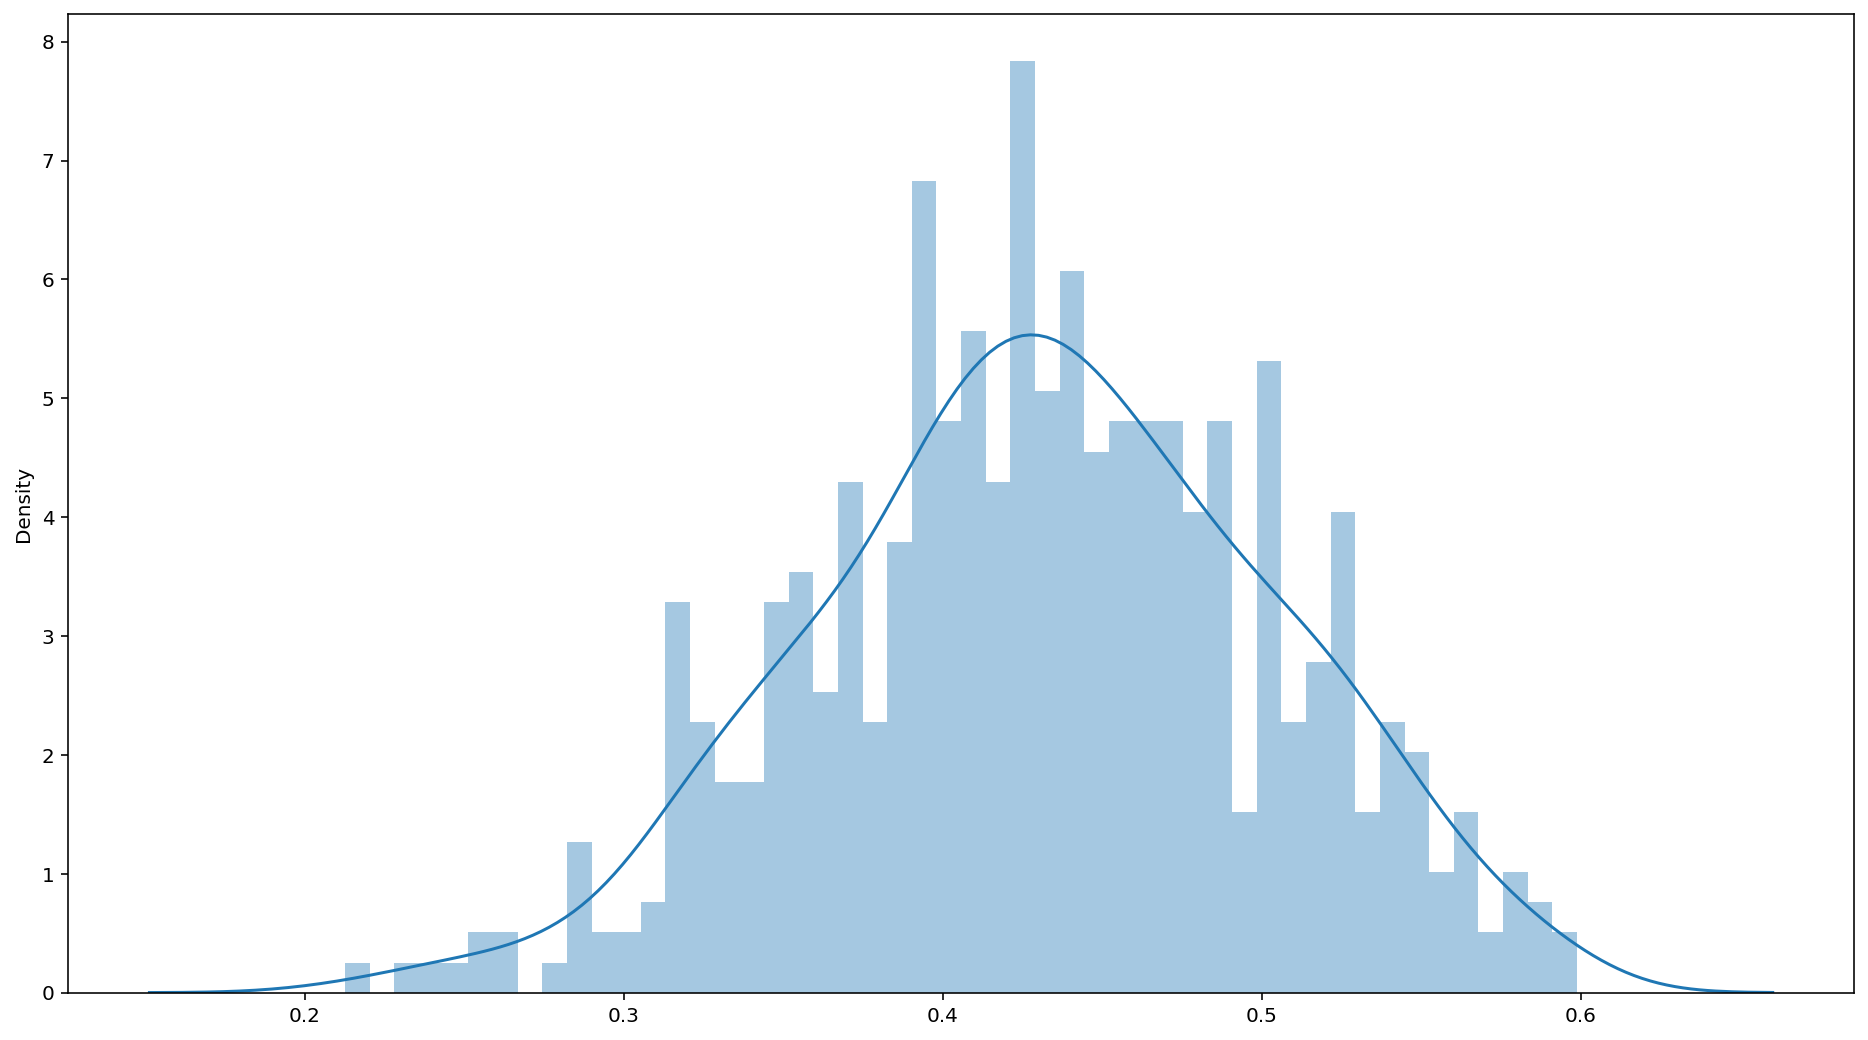

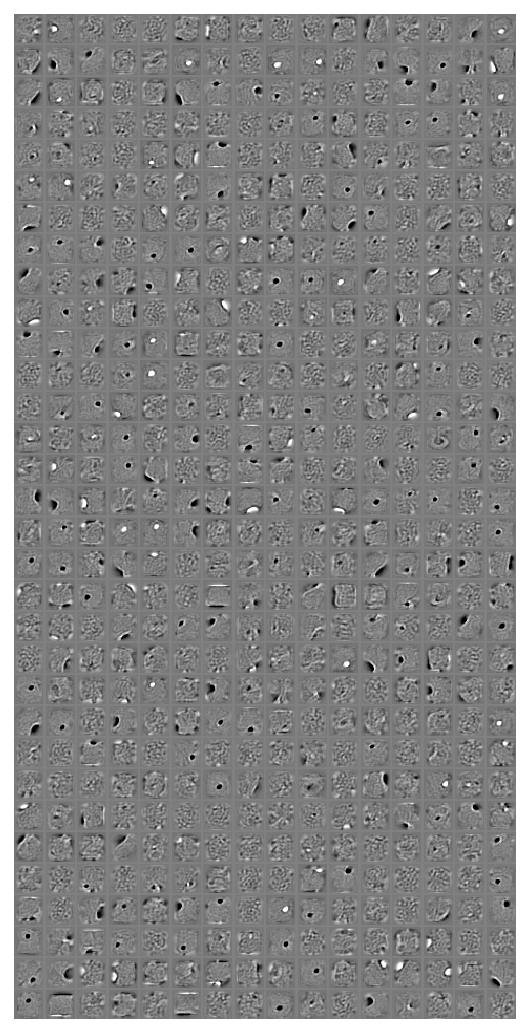

In [ ]:
# Plotting mean hidden activations
activations = feed_forward(rbm.W, mnist_dataset, sigmoid)
mean_activations = np.mean(activations, 1)
sns.distplot(mean_activations, bins=50)

# Displaying RBM filetrs
filters = np.reshape(np.transpose(rbm.W)[:-1, :-1], newshape=(16, -1, 28, 28))
filters = np.clip(filters, -1.0, 1.0)

img = tiles(filters)
plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()